In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.mlab as mlab
import sklearn.mixture
#import seaborn as sns

In [2]:
def scale(X):
    """データ行列Xを属性ごとに標準化したデータを返す"""
    # 属性の数（=列の数）   
    col = X.shape[1]

    # 属性ごとに平均値と標準偏差を計算
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    # 属性ごとデータを標準化
    for i in range(col):
        X[:,i] = (X[:,i] - mu[i]) / sigma[i]

    return X

In [28]:
def make_blob_points(n=300, clusters=3, sigma=0.8, seed=0):
    """染みクラスタのデータを作る関数
    Args:
        n (int): number of points
        clusters (int): number of clusters
        sigma (float): variance
        seed (int): random seed
        
    Returns:
        X (ndarray): 作成した乱数データ
    """
    
    X,y=make_blobs(n_samples=n,         # サンプル点数
               n_features=2,            # 特徴量の次元数
               centers=clusters,        # クラスタの個数
               cluster_std=sigma,       # クラスタ内の標準偏差 
               shuffle=True,            # サンプルをシャッフル
               random_state=seed)
    
    return X

In [4]:
def emplot(gmm, X_train, file_name='emplotdata.png',dpi=150):
    """
        Args:
            X_train
        
    """
    
    plt.gca().set_aspect('equal', adjustable='box')

    # 訓練データを描画
#    plt.plot(X_train[:, 0], X_train[:, 1], 'o')
    plt.scatter(X_train[:,0], X_train[:,1], s=10, color="blue", marker='o')

    
    # メッシュ作成
    x = np.linspace(-3.0, 3.0, 1000)
    y = np.linspace(-3.0, 3.0, 1000)
    X, Y = np.meshgrid(x, y)

    # 各ガウス分布について
    for k in range(n_components):
        # 平均を描画
 #        plt.plot(gmm.means_[k][0], gmm.means_[k][1], 'ro')
        plt.scatter(gmm.means_[k][0], gmm.means_[k][1], s=50, color="red", marker='*')

        # ガウス分布の等高線を描画
        Z = mlab.bivariate_normal(X, Y,
                                  np.sqrt(gmm.covariances_[k][0][0]), np.sqrt(gmm.covariances_[k][1][1]),
                                  gmm.means_[k][0], gmm.means_[k][1],
                                  gmm.covariances_[k][0][1])
        plt.contour(X, Y, Z)

    # メッシュ上の各点での対数尤度の等高線を描画
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = gmm.score_samples(XX)
    Z = Z.reshape(X.shape)
    CS = plt.contour(X, Y, Z)
#    CB = plt.colorbar(CS)

    plt.savefig(file_name,dpi=dpi)
    plt.show()

In [5]:
X = scale(make_blob_points(n=300, clusters=3, sigma=0.6, seed=0))

In [6]:
n_components = 3
gmm = sklearn.mixture.GaussianMixture(n_components, covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

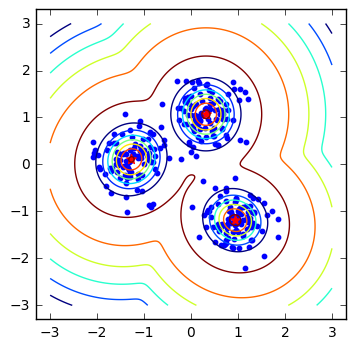

In [7]:
emplot(gmm,X,file_name='emblobpoints01.png')

In [8]:
def make_disk_points(n=10, radius=1.0, center=np.array([0.0,0.0]), seed=0):
    """円形一様分布する乱数の作成
    Args:
        n (int): number of points
        radius (float): radius of the disk
        center: center of the disk
        seed (int): random seed
        
    Returns:
        X: 作成した乱数データ
    """
    np.random.seed(seed)                                   # random seed
    r = np.random.uniform(low=0, high=radius**2, size=n)   # radius
    theta = np.random.uniform(low=0, high=2*np.pi, size=n) # angle
    
    x = center[0] + np.sqrt(r) * np.cos(theta)
    y = center[1] + np.sqrt(r) * np.sin(theta)
    
    X = np.vstack([x,y]).T
    
    return X

In [25]:
X1 = make_disk_points(n=200,center=np.array([0.0,1.5]), radius=1, seed=0)
X2 = make_disk_points(n=200,center=np.array([0.0,-1.5]), radius=1, seed=1)
X = np.vstack([X1,X2])
transformation=np.array([[1,0],[0,0.2]])
X = scale(np.dot(X, transformation))

In [26]:
n_components = 2
gmm = sklearn.mixture.GaussianMixture(n_components, covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

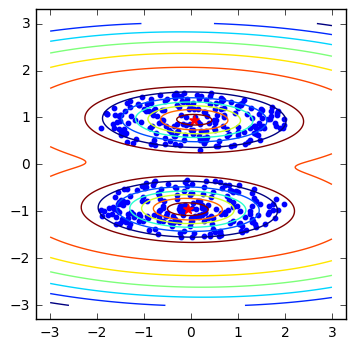

In [27]:
emplot(gmm,X,file_name='emelliptic01.png')

In [13]:
X1 = make_disk_points(n=200,center=np.array([0.0,0.0]), radius=2, seed=1)
X2 = make_disk_points(n=200,center=np.array([2.0,3.0]), radius=0.8, seed=1)
X3 = make_disk_points(n=200,center=np.array([-2.0,3.0]), radius=0.8, seed=1)
X = np.vstack([X1,X2,X3])
#X = scale(X)

In [14]:
n_components = 3
gmm = sklearn.mixture.GaussianMixture(n_components, max_iter=300,init_params='kmeans',covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=300,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

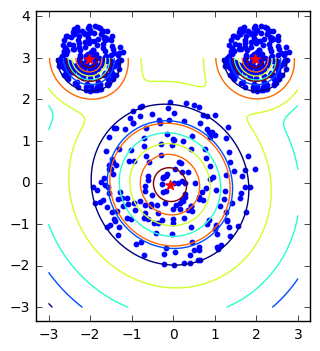

In [15]:
emplot(gmm,X,file_name='emmickey01.png')

In [16]:
X1 = make_disk_points(n=400,center=np.array([0.0,0.0]), radius=2, seed=1)
X2 = make_disk_points(n=50,center=np.array([1.8,2.8]), radius=0.8, seed=1)
X3 = make_disk_points(n=50,center=np.array([-1.8,2.8]), radius=0.8, seed=1)
X = np.vstack([X1,X2,X3])
X = scale(X)

In [17]:
n_components = 3
gmm = sklearn.mixture.GaussianMixture(n_components, max_iter=300,init_params='kmeans',covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=300,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

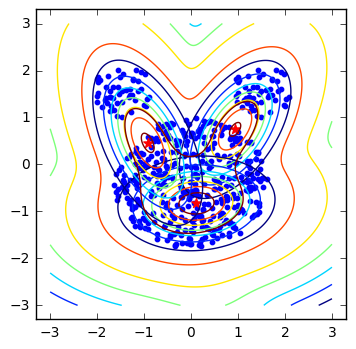

In [18]:
emplot(gmm,X,file_name='emmickey02.png')

In [19]:
# データセットtwo_moons
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
X = scale(X)

In [20]:
n_components = 2
gmm = sklearn.mixture.GaussianMixture(n_components, covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

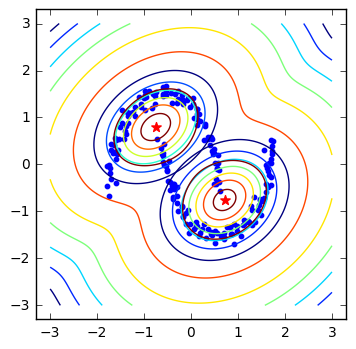

In [23]:
emplot(gmm,X,file_name='emtwomoons01.png')